<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Classification/Logisitic_Regression_on_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


def simple_plot(X,Y,my_label='data'):
  plt.plot(X,Y,'o',label=my_label)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()

In [ ]:
df = pd.read_csv('titanic_train.csv')
df['Male'] = (df['Sex'] == 'male')*1.0
df['logFare'] = np.log(df['Fare']+1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,AnySib,AnyPar,Class1,Class2,Class3,Adult,logFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.433987


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,AnySib,AnyPar,Class1,Class2,Class3,Adult,logFare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.317621,0.239057,0.242424,0.206510,0.551066,0.645342,2.962246
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.465813,0.426747,0.428790,0.405028,0.497665,0.478678,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.737881
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.240917


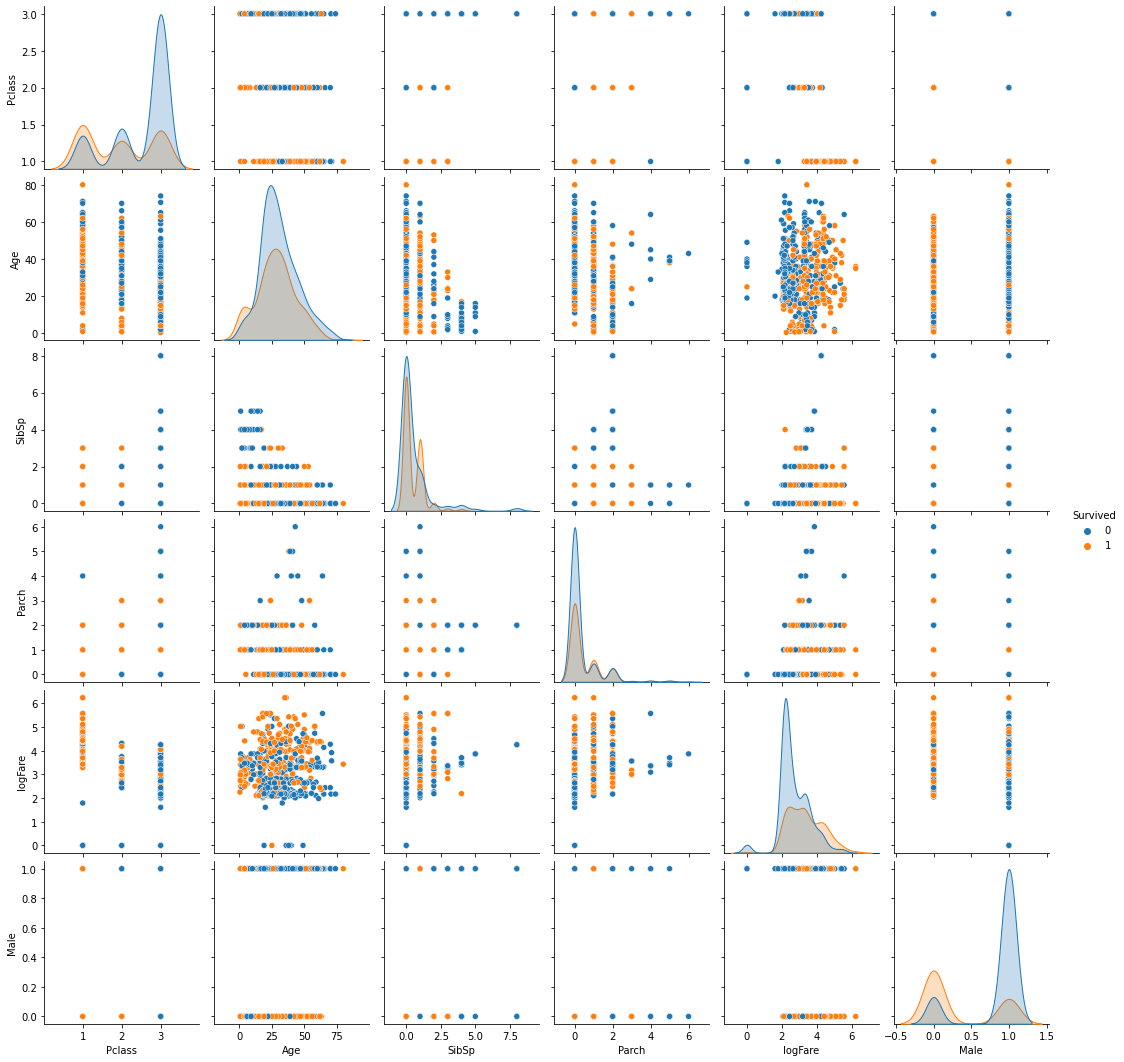

In [ ]:
my_vars = ['Pclass','Age','SibSp','Parch','logFare','Male']
sns.pairplot(df, vars=my_vars, hue="Survived",dropna=True)

In [ ]:
my_df = df[ ['Survived']+my_vars ].dropna()

X = np.array( my_df[my_vars]  )
Y = np.array( my_df[ 'Survived'] )

from sklearn.linear_model import LogisticRegression

glm_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit = glm_model.fit(X, Y)


params_dict = dict(list(zip(my_vars,list(glm_fit.coef_[0]))))
for item in params_dict.items():
    print(item)


('Pclass', -1.1359354726730237)
('Age', -0.0441404404493539)
('SibSp', -0.42168090617811904)
('Parch', -0.09948840622995717)
('logFare', 0.22751404679032464)
('Male', -2.619756652527259)


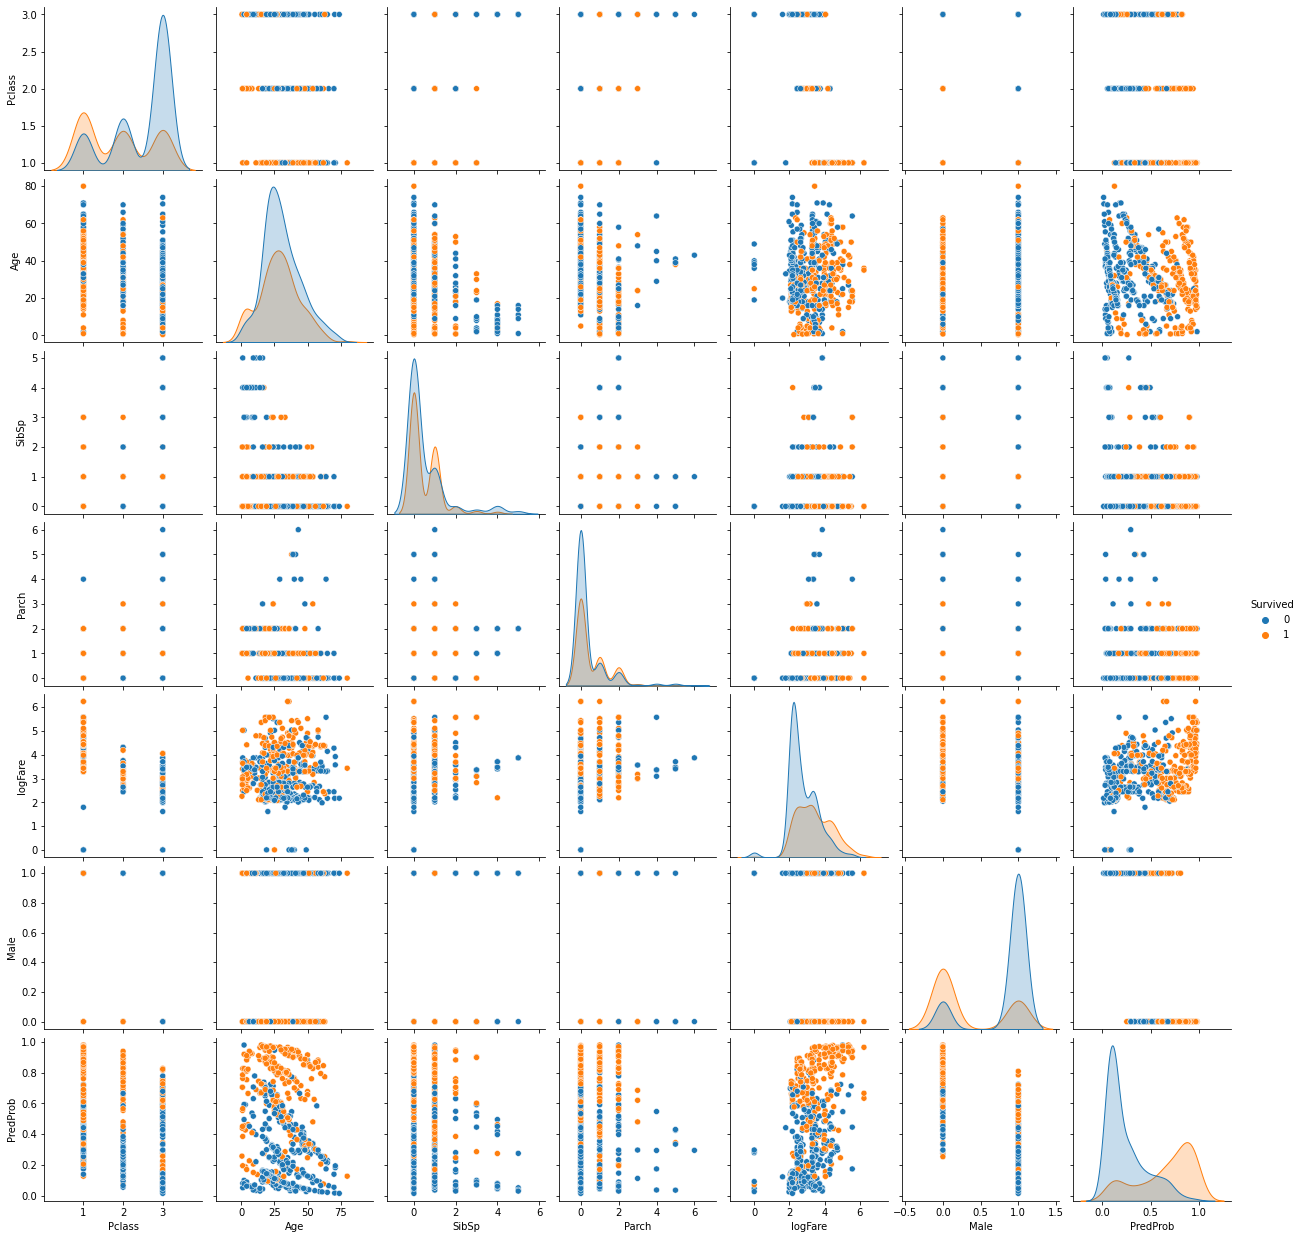

In [ ]:
my_df['PredProb'] = glm_model.predict_proba(X)[:,1]
sns.pairplot(my_df, vars=my_vars+['PredProb'], hue="Survived",dropna=True)

In [ ]:
from sklearn.model_selection import train_test_split
import itertools

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

In [ ]:
#Try all subsets that include 'Male'

best_CE_val = np.inf
best_CE_vars = []

best_Acc_val = 0
best_Acc_vars = []

for my_vars in [ list(subset)  +['Male'] for subset in powerset(['Pclass','Age','SibSp','Parch','logFare']) ]:
  print("-----------------------")
  print(f"Vars: {my_vars}")
  print("-----------------------")

  X = np.array( my_df[my_vars]  )
  Y = np.array( my_df[ 'Survived'] )

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  LR_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
  LR_fit = LR_model.fit(X_train, Y_train)

  accuracy = LR_model.score(X_test,Y_test)
  print(f"  Test Accuracy:\n {accuracy:.3f}")

  if accuracy > best_Acc_val:
    best_Acc_val = accuracy
    best_Acc_vars = my_vars

  preds = LR_model.predict_proba(X_test)[:,1]
  CE_loss = np.mean(-Y_test*np.log(preds) - (1-Y_test)*np.log(1-preds))
  print(f"  CE Loss:\n {CE_loss:.3f}")

  if CE_loss < best_CE_val:
    best_CE_val = CE_loss
    best_CE_vars = my_vars


  params_dict = dict(list(zip(my_vars,list(LR_model.coef_[0]))))
  for item in params_dict.items():
      print(f'    {item[0]} : {item[1]:.3f}')

print("##################")
print(f"Best Acc {best_Acc_val} from {best_Acc_vars}")
print(f"Best CE {best_CE_val} from {best_CE_vars}")

-----------------------
Vars: ['Male']
-----------------------
  Test Accuracy:
 0.734
  CE Loss:
 0.585
    Male : -2.636
-----------------------
Vars: ['Pclass', 'Male']
-----------------------
  Test Accuracy:
 0.734
  CE Loss:
 0.507
    Pclass : -0.951
    Male : -2.752
-----------------------
Vars: ['Age', 'Male']
-----------------------
  Test Accuracy:
 0.734
  CE Loss:
 0.596
    Age : -0.012
    Male : -2.607
-----------------------
Vars: ['SibSp', 'Male']
-----------------------
  Test Accuracy:
 0.734
  CE Loss:
 0.574
    SibSp : -0.185
    Male : -2.685
-----------------------
Vars: ['Parch', 'Male']
-----------------------
  Test Accuracy:
 0.734
  CE Loss:
 0.583
    Parch : -0.125
    Male : -2.699
-----------------------
Vars: ['logFare', 'Male']
-----------------------
  Test Accuracy:
 0.741
  CE Loss:
 0.545
    logFare : 0.642
    Male : -2.492
-----------------------
Vars: ['Pclass', 'Age', 'Male']
-----------------------
  Test Accuracy:
 0.741
  CE Loss:
 0.517

In [ ]:
#my_vars = ['Age', 'SibSp', 'logFare', 'Male']
my_vars = ['Age', 'Pclass', 'SibSp', 'Parch', 'logFare', 'Male']
X = np.array( my_df[my_vars]  )
Y = np.array( my_df[ 'Survived'] )

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
LR_fit = LR_model.fit(X, Y)

accuracy = LR_model.score(X,Y)
print(f"  SELF Accuracy:\n {accuracy:.3f}")

if accuracy > best_Acc_val:
    best_Acc_val = accuracy
    best_Acc_vars = my_vars

preds = LR_model.predict_proba(X)[:,1]
CE_loss = np.mean(-Y*np.log(preds) - (1-Y)*np.log(1-preds))
print(f"  SELF CE Loss:\n {CE_loss:.3f}")

params_dict = dict(list(zip(my_vars,list(LR_model.coef_[0]))))
for item in params_dict.items():
    print(item)

  SELF Accuracy:
 0.801
  SELF CE Loss:
 0.445
('Age', -0.04414043772840454)
('Pclass', -1.1359353116619704)
('SibSp', -0.4216807616076179)
('Parch', -0.09948845675620124)
('logFare', 0.22751418193144235)
('Male', -2.61975672675815)


In [ ]:
test_df = pd.read_csv('titanic_test.csv')
test_df['Male'] = (test_df['Sex'] == 'male')*1.0
test_df['logFare'] = np.log(test_df['Fare']+1)
test_df = test_df.fillna(test_df.mean())
X = np.array( test_df[my_vars]  )

test_df['Survived'] = LR_model.predict(X)

answers = test_df[ ['PassengerId','Survived']  ]

answers.to_csv('answers.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


# Kaggle Submission

It turns out we did worse than just guessing all the men died and all the women lived :'(

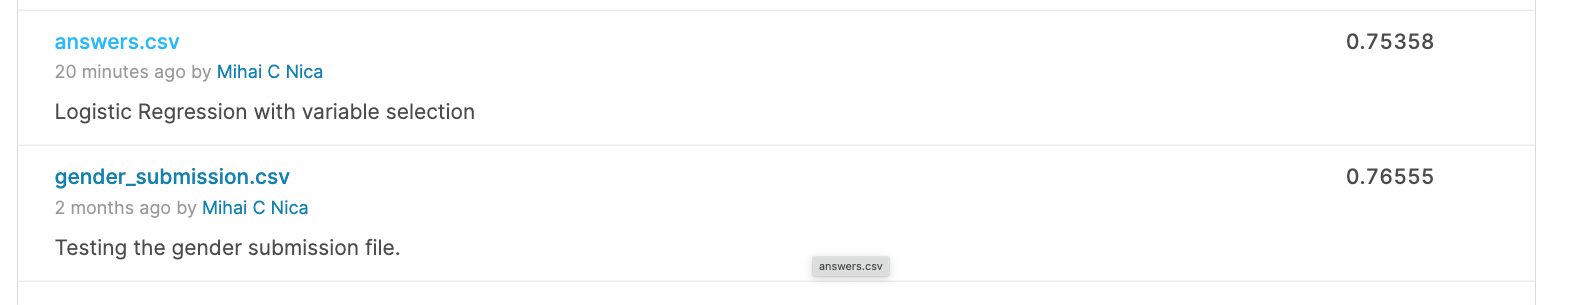